# 🏘️ Property Listing Appeal Classification + Phrase Extraction
This notebook analyzes **Polish property export listings** using NLP.

**Upgraded Features:**
- Translate descriptions (Polish → English)
- Classify listings by **appeal** (Appealing, Unappealing, Neutral)
- Extract top phrases (bigrams/trigrams)

**Tools:** `TextBlob`, `Pandas`, `Matplotlib`, `scikit-learn`

In [2]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 📥 Load and Inspect Data

In [5]:
# Load your data
df = pd.read_csv("Polish export oct.csv")
df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')
df[['title', 'description']].head()

,title,description
0,"built-up plot No. 15 with an area of 8.3696ha,...",Land property consisting of a plot of land wit...
1,plot of land with an area of 0.0501 ha,Plot No. 151/5 with an area of 0.0501 ha is a ...
2,Land property,The auction is subject to the land property co...
3,premises,premises constituting a separate property – a ...
4,ownership of a dwelling,ownership right to residential unit No. 5 with...


## 🌍 Translate Descriptions from Polish to English

In [8]:
def translate_text(text):
    try:
        return str(TextBlob(text).translate(to='en'))
    except:
        return text  # fallback

df['translated'] = df['text'].apply(translate_text)
df[['text', 'translated']].head()

,text,translated
0,"built-up plot No. 15 with an area of 8.3696ha,...","built-up plot No. 15 with an area of 8.3696ha,..."
1,plot of land with an area of 0.0501 ha Plot No...,plot of land with an area of 0.0501 ha Plot No...
2,Land property The auction is subject to the la...,Land property The auction is subject to the la...
3,premises premises constituting a separate prop...,premises premises constituting a separate prop...
4,ownership of a dwelling ownership right to res...,ownership of a dwelling ownership right to res...


## ✅ Classify Appeal Using Keywords

In [11]:
# Rule-based classifier
positive_keywords = ['renovated', 'spacious', 'modern', 'garden', 'garage', 'luxury', 'sunny']
negative_keywords = ['needs repair', 'unfinished', 'damaged', 'small', 'damp', 'mold', 'old']

def classify_appeal(text):
    text_lower = text.lower()
    if any(word in text_lower for word in positive_keywords):
        return 'Appealing'
    elif any(word in text_lower for word in negative_keywords):
        return 'Unappealing'
    else:
        return 'Neutral'

df['appeal'] = df['translated'].apply(classify_appeal)
df[['translated', 'appeal']].head()

,translated,appeal
0,"built-up plot No. 15 with an area of 8.3696ha,...",Neutral
1,plot of land with an area of 0.0501 ha Plot No...,Neutral
2,Land property The auction is subject to the la...,Neutral
3,premises premises constituting a separate prop...,Neutral
4,ownership of a dwelling ownership right to res...,Neutral


## 📊 Appeal Classification Results

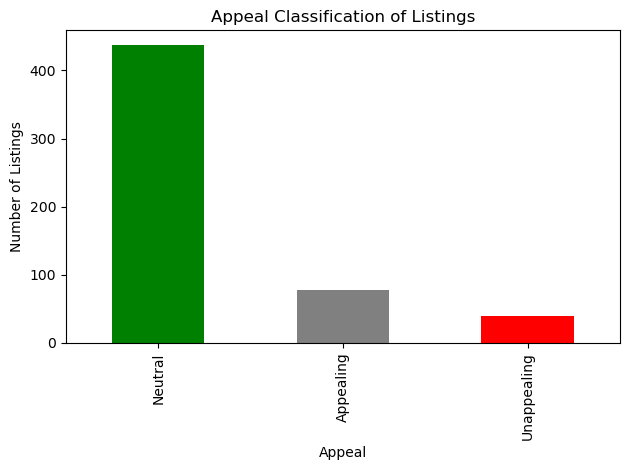

In [14]:
df['appeal'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Appeal Classification of Listings')
plt.xlabel('Appeal')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

## 🧠 Extract Top Phrases (2–3 words)

In [19]:
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(df['translated'])

phrase_counts = pd.DataFrame(
    X.sum(axis=0).T,  # transpose here!
    index=vectorizer.get_feature_names_out(),
    columns=['count']
)

top_phrases = phrase_counts.sort_values(by='count', ascending=False).head(20)
top_phrases


,count
land mortgage,460
land property,341
land mortgage register,303
mortgage register,303
residential building,268
real estate,263
property located,219
usable area,206
district court,194
spatial development,171


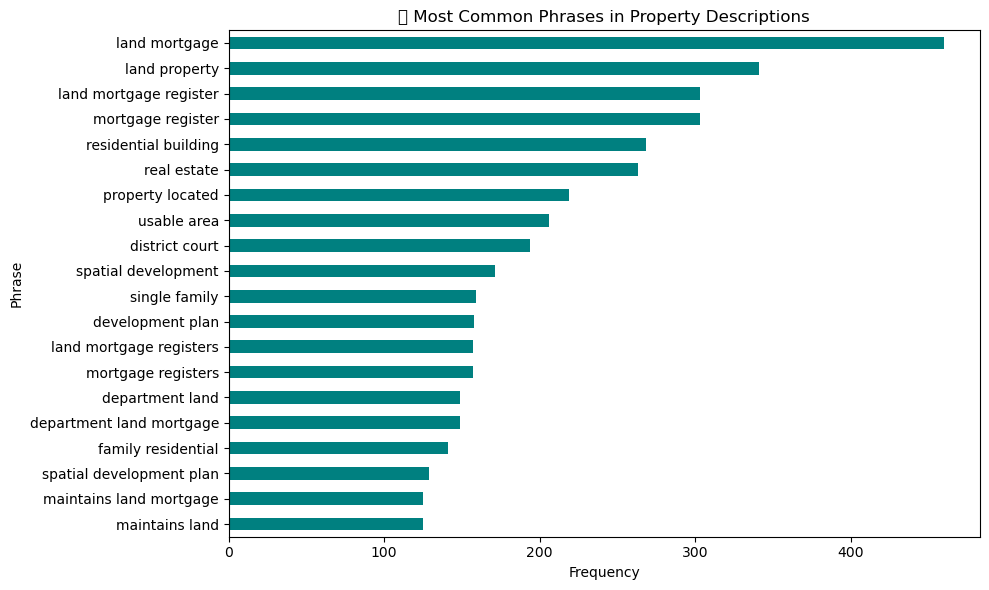

In [22]:
# Bar chart of top 20 bigrams/trigrams
top_phrases.plot(kind='barh', figsize=(10, 6), legend=False, color='teal')
plt.title('🔠 Most Common Phrases in Property Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


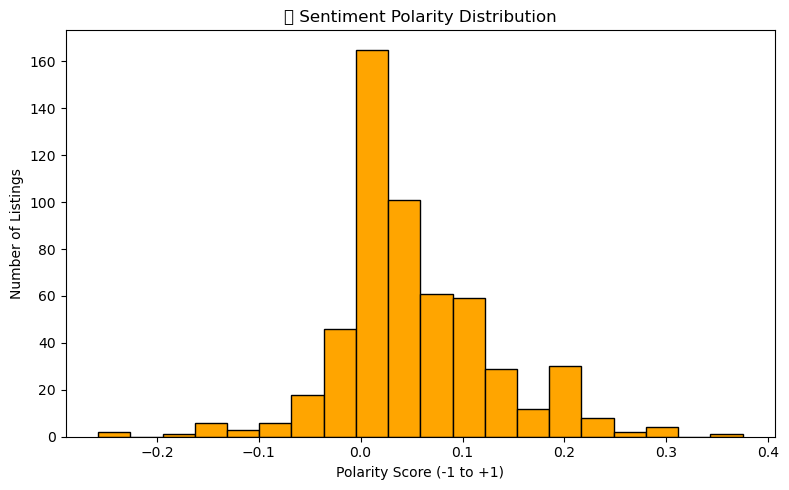

In [24]:
# Optional: Sentiment polarity distribution from TextBlob
df['polarity'] = df['translated'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(8, 5))
plt.hist(df['polarity'], bins=20, color='orange', edgecolor='black')
plt.title('🟠 Sentiment Polarity Distribution')
plt.xlabel('Polarity Score (-1 to +1)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


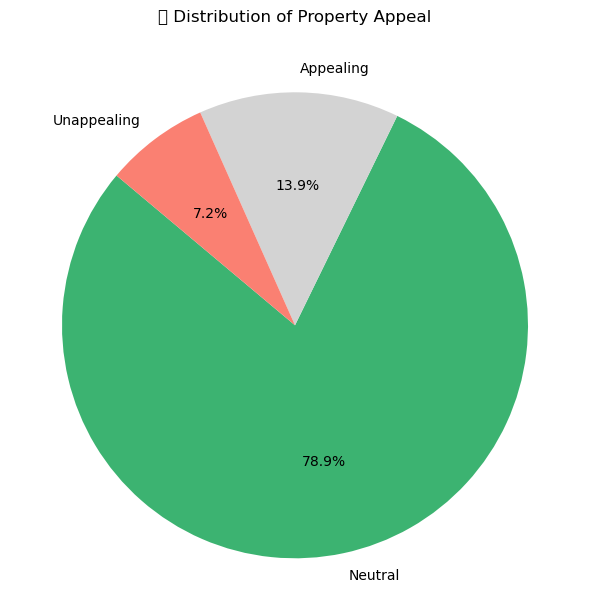

In [28]:
# Pie chart of appeal categories (with adjusted title position)
appeal_counts = df['appeal'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    appeal_counts, 
    labels=appeal_counts.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=['mediumseagreen', 'lightgray', 'salmon']
)
plt.title('🧭 Distribution of Property Appeal', y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [30]:
# Filter only appealing listings
appealing_df = df[df['appeal'] == 'Appealing'].copy()
print(f"Total appealing listings: {len(appealing_df)}")
appealing_df[['translated']].head(5)


Total appealing listings: 77


,translated
10,Residential premises Residential premises loca...
12,Built-up plot of land No. 1164 with an area of...
14,Auction of real estate. in the form of an elec...
16,"residential premises located: 62-020 Zalasewo,..."
38,detached single-family building with an area o...


In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram/trigram analysis only on appealing listings
vec = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vec.fit_transform(appealing_df['translated'])

appealing_phrases = pd.DataFrame(
    X.sum(axis=0).T, 
    index=vec.get_feature_names_out(), 
    columns=["count"]
).sort_values(by="count", ascending=False)

top_appealing_phrases = appealing_phrases.head(20)
top_appealing_phrases


,count
residential building,101
land mortgage,74
usable area,69
single family,67
land property,59
family residential,57
land mortgage register,51
mortgage register,51
single family residential,49
ground floor,42


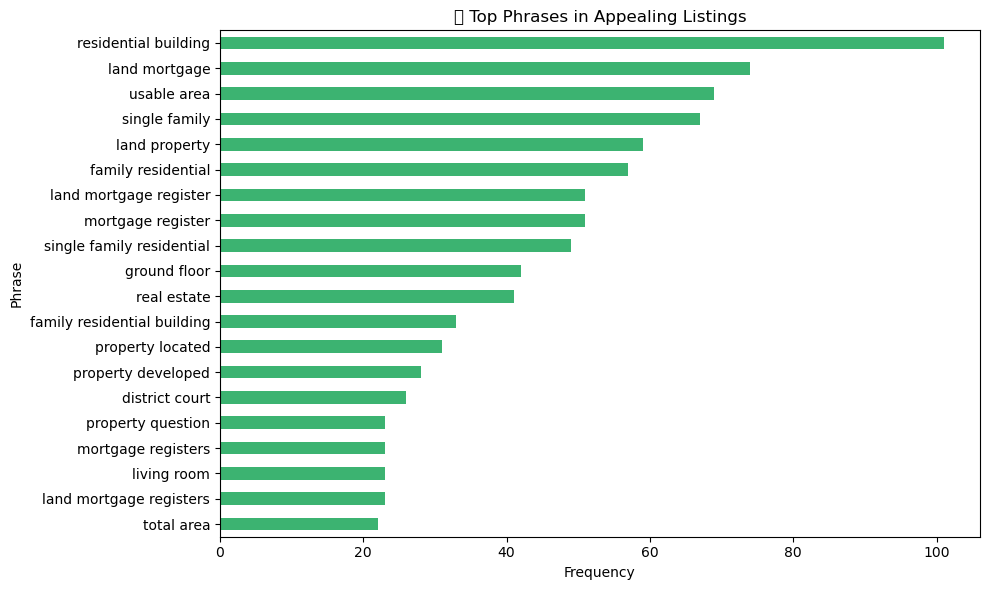

In [36]:
# Bar plot for top phrases in appealing listings
top_appealing_phrases.plot(kind='barh', figsize=(10, 6), legend=False, color='mediumseagreen')
plt.title("🌿 Top Phrases in Appealing Listings")
plt.xlabel("Frequency")
plt.ylabel("Phrase")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


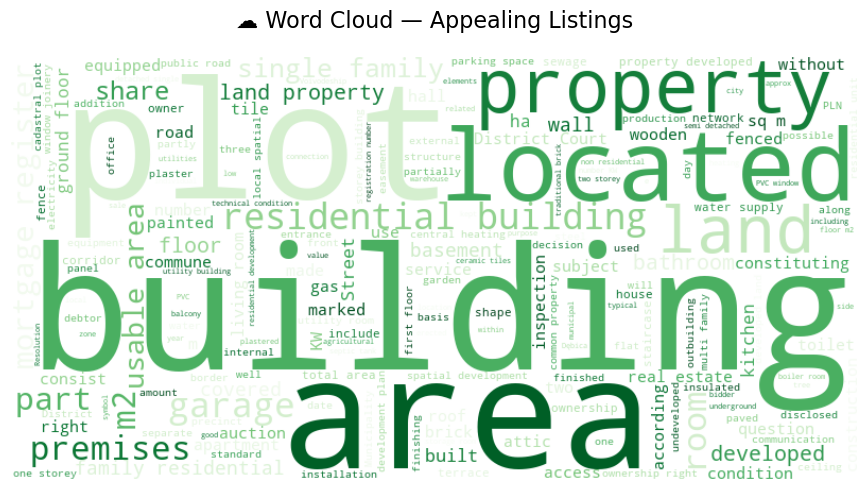

In [38]:
from wordcloud import WordCloud

# Generate word cloud
text = ' '.join(appealing_df['translated'])

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='Greens'
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("☁️ Word Cloud — Appealing Listings", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


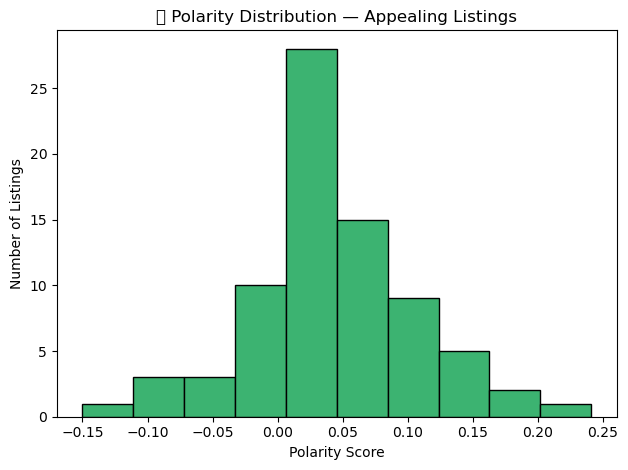

In [40]:
plt.hist(appealing_df['polarity'], bins=10, color='mediumseagreen', edgecolor='black')
plt.title('💚 Polarity Distribution — Appealing Listings')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()


In [44]:
# 💰 Price distribution by appeal (if price column exists)
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['starting_price'], errors='coerce')

    plt.figure(figsize=(8, 5))
    df.boxplot(column='price', by='appeal', grid=False, patch_artist=True,
               boxprops=dict(facecolor='lightblue'),
               medianprops=dict(color='red'))

    plt.title('💰 Price Distribution by Appeal')
    plt.suptitle('')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Column 'price' not found in dataset.")


⚠️ Column 'price' not found in dataset.


## ✅ Summary
- Translated listings from Polish to English
- Classified appeal using keyword rules
- Extracted most frequent phrases to understand listing language